<a href="https://colab.research.google.com/github/RoxPiceno/Estadistica-Multivariada/blob/main/Ejercicios_de_Regresi%C3%B3n_Log%C3%ADstica_P%C3%A9rez%26Piceno.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ------ Regresión Logística aplicada a Economía ------

# Ejercicio: ¿Una Alcaldia logra reducir la pobreza como resultado de su gasto social y cobertura educativa? Queremos analizar si un municipio logra reducir la pobreza dadas las variables de: Gasto social per cápita anual (en miles de pesos) y Cobertura educativa (% de población con educación básica completa).

#Definir variables

# GSpk = Gasto social per cápita anual (en miles de pesos)
# Edu = Cobertura educativa (% de población con educación básica completa)
#Reducción_pobreza
# 1= alcaldía reduce la pobreza
# 0= no la reduce

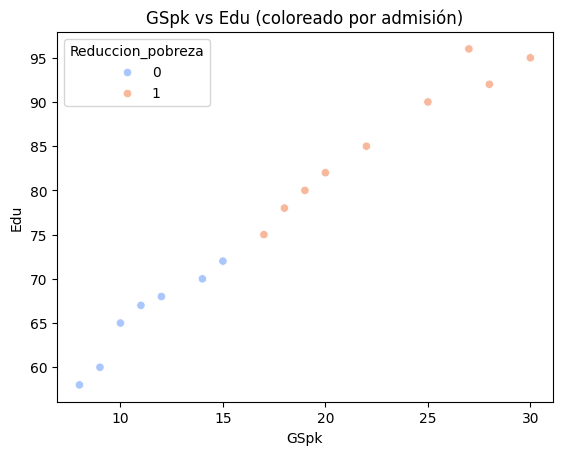

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Crear un dataset de ejemplo
data = {
    'GSpk': [22, 18, 15, 10, 12, 25, 20, 14, 28, 9, 17, 11, 30, 8, 19, 27],
    'Edu': [85, 78, 72, 65, 68, 90, 82, 70, 92, 60, 75, 67, 95, 58, 80, 96],
    'Reduccion_pobreza': [1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1]
}
df = pd.DataFrame(data)
df.head()

sns.scatterplot(data=df, x='GSpk', y='Edu', hue='Reduccion_pobreza', palette='coolwarm')
plt.title('GSpk vs Edu (coloreado por admisión)')
plt.show()

Se observa que, cuando hay un Gasto Social más alto hay más cobertura en educación, es decir, si una Alcaldía destina más recursos al gasto social puede brindar mayor cobertura de educación básica, propiciando una reducción de pobreza.

# Entrenar un modelo de regresión logística

In [ ]:
# Separar variables
X = df[['GSpk', 'Edu']]
y = df['Reduccion_pobreza']

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear el modelo
modelo = LogisticRegression()
modelo.fit(X_train, y_train)

LogisticRegression()

# Evaluar el modelo

In [ ]:
# Predicciones
y_pred = modelo.predict(X_test)

# Matriz de confusión y reporte
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1 0]
 [0 4]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         4

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



# Probabilidades

In [ ]:
# Ver la probabilidad de admisión
probabilidades = modelo.predict_proba(X_test)
resultados = X_test.copy()
resultados['Prob_Admitido'] = probabilidades[:, 1]
resultados['Predicción'] = y_pred
print(resultados)

    GSpk  Edu  Prob_Admitido  Predicción
0     22   85   9.999740e-01           1
1     18   78   9.802142e-01           1
5     25   90   9.999998e-01           1
14    19   80   9.967933e-01           1
13     8   58   5.238867e-07           0


# Como se puede constatar, con la obervación 1, para una alcaldía con un gasto social per cápita de 18 mil pesos y una cobertura educativa del 78%, el modelo de regresión logística estima una probabilidad del 98.02% de que se observe una reducción en la incidencia de la pobreza. Dado que esta probabilidad supera el umbral de decisión, la alcaldía se clasifica como un caso de éxito en términos de reducción de pobreza.
#Por el contrario, la obervación 13 muestra una alcald+ia con un gasto social per cápita de 8 mil pesos y una cobertura educativa del 58%, el modelo de regresión logística estima una probabilidad prácticamente nula (≈ 0.0000005) de que se observe una reducción en la incidencia de la pobreza. Entonces, esta probabilidad se encuentra muy por debajo del umbral de decisión, el municipio es clasificado como un caso sin reducción de pobreza.

# Interpretar coeficientes

In [ ]:
coeficientes = pd.DataFrame({
    'Variable': ['Intercepto'] + X.columns.tolist(),
    'Coeficiente': [modelo.intercept_[0]] + modelo.coef_[0].tolist()
})
print(coeficientes)

     Variable  Coeficiente
0  Intercepto   -45.471556
1      Clases     0.557996
2       Horas     0.124799


# Si el gasto social per cápita y la cobertura educativa fueran cero, la probabilidad de reducir pobreza sería prácticamente nula. Ante un incremento de una unidad en el gasto social per cápita reduce la pobreza en 0.558, manteniendo constante la cobertura educativa. Es decir, una mayor cobertura educativa incrementa la probabilidad de reducción de pobreza, aunque con un efecto marginal menor que el del gasto social.

# ------ Regresión Logística aplicada a la Fórmula 1 ------
# El siguiente ejercicio se presenta de manera ilustrativa, se utiliza una sola carrera como unidad de análisis para mostrar la lógica de la regresión logística y la interpretación de probabilidades. Dado que, para una aplicación real, se requiere analizar más de una carrera.

# Ejercicio 2: ¿Un piloto termina en el podio (Top 3) dadas su posición de clasificación y su ritmo de carrera?

#Definir variables

# Posicion_Clasificacion = Posición en la qualy (1 = pole, 20 = último)
# Posición de salida en la qualy
# 1 = pole, números más altos = peor posición

# Ritmo_Carrera = Ritmo promedio de carrera (segundos por vuelta)
# Tiempo promedio por vuelta (segundos)
# Menor = más rápido

#Podio
# 1= el piloto termina en el podio (P1, P2 o P3)
# 0= no termina en el podio

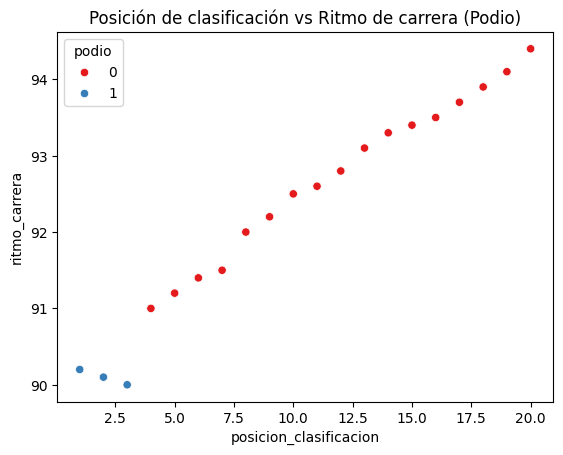

 Matriz de Confusión:
[[5 0]
 [0 1]]

 Reporte de Clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         1

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6


 Resultados con Probabilidades:
    posicion_clasificacion  ritmo_carrera  Probabilidad_podio  Predicción  \
10                      11           92.6            0.000248           0   
6                        7           91.5            0.019550           0   
13                      14           93.3            0.000010           0   
9                       10           92.5            0.000675           0   
0                        1           90.2            0.922456           1   
15                      16           93.5            0.000001           0   

    Real  
10     0  
6      0  
13

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


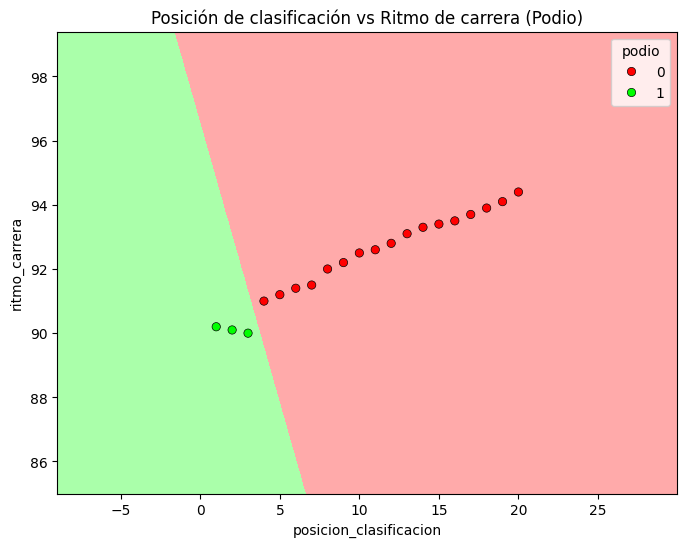

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Crear el dataset
data = {
    'posicion_clasificacion': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
    'ritmo_carrera': [90.2, 90.1, 90.0, 91.0, 91.2, 91.4, 91.5, 92.0, 92.2, 92.5, 92.6, 92.8, 93.1, 93.3, 93.4, 93.5, 93.7, 93.9, 94.1, 94.4],
    'podio': [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
}
df = pd.DataFrame(data)

# Visualizar Datos
sns.scatterplot(data=df, x='posicion_clasificacion', y='ritmo_carrera', hue='podio', palette='Set1')
plt.title('Posición de clasificación vs Ritmo de carrera (Podio)')
plt.show()

# Variables para el modelo
X = df[['posicion_clasificacion', 'ritmo_carrera']]
y = df['podio']

# Dividir en conjunto de entrenamiento y prueba
# random_state=42 es una semilla de aleatoriedad para garantizar la reproducibilidad de los resultados y es una convención popular NO tiene significado estadístico.
# para este caso, al ser pocas observaciones y por ejemplicar se usa stratify=y porque obliga a que la variable dependiente mantenga la misma proporción de 0 y 1 en el conjunto de entrenamiento y en el conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Entrenar el modelo de regresión logística
modelo = LogisticRegression()
modelo.fit(X_train, y_train)

# Evaluar el modelo
y_pred = modelo.predict(X_test)

print(" Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred))

print("\n Reporte de Clasificación:")
print(classification_report(y_test, y_pred))

# Probabilidades de predicción
probabilidades = modelo.predict_proba(X_test)
resultados = X_test.copy()
resultados['Probabilidad_podio'] = probabilidades[:, 1]
resultados['Predicción'] = y_pred
resultados['Real'] = y_test.values
print("\n Resultados con Probabilidades:")
print(resultados)

#  Coeficientes del modelo
coeficientes = pd.DataFrame({
    'Variable': ['Intercepto'] + X.columns.tolist(),
    'Coeficiente': [modelo.intercept_[0]] + modelo.coef_[0].tolist()
})
print("\n Coeficientes del Modelo:")
print(coeficientes)

# Frontera de decisión (opcional, solo si quieres ver el plano)
from matplotlib.colors import ListedColormap

def plot_decision_boundary(X, y, model):
    h = .02  # resolución de la malla
    x_min, x_max = X['posicion_clasificacion'].min() - 10, X['posicion_clasificacion'].max() + 10
    y_min, y_max = X['ritmo_carrera'].min() - 5, X['ritmo_carrera'].max() + 5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
    cmap_bold = ['#FF0000', '#00FF00']
    plt.contourf(xx, yy, Z, cmap=cmap_light)
    sns.scatterplot(x='posicion_clasificacion', y='ritmo_carrera', hue=y, data=X, palette=cmap_bold, edgecolor='k')
    plt.title('Posición de clasificación vs Ritmo de carrera (Podio)')
    plt.xlabel('posicion_clasificacion')
    plt.ylabel('ritmo_carrera')
    plt.show()

plot_decision_boundary(df[['posicion_clasificacion', 'ritmo_carrera']], df['podio'], modelo)

#El gráfico muestra que los pilotos que parten desde posiciones delanteras y presentan un ritmo de carrera más rápido se ganan los lugares de podio, mientras que aquellos con posiciones de salida más retrasadas y ritmos más lentos no alcanzan el podio. El coeficiente negativo asociado a la posición de clasificación indica que salir desde posiciones más retrasadas reduce la probabilidad de que un piloto termine en el podio, manteniendo constante el ritmo de carrera. El coeficiente negativo del ritmo de carrera sugiere que un aumento en el tiempo promedio por vuelta (es decir, un ritmo más lento) disminuye la probabilidad de finalizar en el podio, manteniendo constante la posición de salida.